<a href="https://colab.research.google.com/github/idksebastian/AnalisisDeDatos/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerias

import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;


from google.colab import drive;

#Montamos el drive

drive.mount('gdrive')
ruta = '/content/gdrive/MyDrive/Analisis De Datos/Listado_de_Artistas_PEREIRA_20251201.csv'
data = pd.read_csv(ruta)

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
#Mostramos los tipos de datos

print(data.dtypes)
print(data.shape)
data.head()

Artistas       object
Link           object
Descripción    object
Responsable    object
Produción      object
dtype: object
(1327, 5)


,Artistas,Link,Descripción,Responsable,Produción
0,Amparo Ochoa,Cantautora - Mexicana – 4Julio,https://co.ivoox.com/es/amparo-ochoa-cantautor...,"Amparo Ochoa, Cantautora - Mexicana – 4Julio",No aplica
1,En 1965 participó y ganó un concurso en su ciu...,"con la canción llamada """"Hermosísimo Lucero""""....",tanto mexicanos como del resto de Latinoamérica.,No aplica,No aplica
2,EL poeta Mexicano Elías Nandino,desde una cantidad escribe esta gran obra lite...,No aplica,No aplica,No aplica
3,Desde muy pequeña,destacó cantando en casa junto a su padre Don ...,No aplica,No aplica,No aplica
4,Escucharemos a Ismael Rodríguez Gómez. Viajero...,Efrain Cardona Gaviria,El Viaje – 12/Mayo,No aplica,No aplica


In [4]:
# Inspeccionar Tipos de Datos y Dimensiones


data.info()
print("\nDataFrame shape:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artistas     1327 non-null   object
 1   Link         1303 non-null   object
 2   Descripción  1327 non-null   object
 3   Responsable  1327 non-null   object
 4   Produción    1327 non-null   object
dtypes: object(5)
memory usage: 52.0+ KB

DataFrame shape: (1327, 5)


In [5]:
# Identificar Valores Faltantes

missing_values = data.isnull().sum()
percentage_missing = (missing_values / len(data)) * 100

missing_info = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante (%)': percentage_missing.round(2)
})

print("\nInformación de Valores Faltantes:")
print(missing_info[missing_info['Valores Faltantes'] > 0])


Información de Valores Faltantes:
      Valores Faltantes  Porcentaje Faltante (%)
Link                 24                     1.81


In [6]:

#Revisar Valores Únicos en Columnas de Texto

print("\nValores Únicos por Columna de Tipo Objeto:")
for column in data.columns:
    if data[column].dtype == 'object':
        unique_count = data[column].nunique()
        print(f"Columna '{column}': {unique_count} valores únicos")


Valores Únicos por Columna de Tipo Objeto:
Columna 'Artistas': 591 valores únicos
Columna 'Link': 553 valores únicos
Columna 'Descripción': 410 valores únicos
Columna 'Responsable': 22 valores únicos
Columna 'Produción': 52 valores únicos


In [7]:
#Este código tiene como objetivo analizar el contenido de las columnas de tipo 'object' en el DataFrame

print("\nAnálisis de Contenido para Columnas de Tipo 'Object':")
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values_count = data[column].nunique()
        print(f"\nColumna '{column}': {unique_values_count} valores únicos")

        if unique_values_count < 20:
            print("Valores únicos:")
            print(data[column].unique())
        else:
            print("20 valores más frecuentes:")
            print(data[column].value_counts().head(20))


Análisis de Contenido para Columnas de Tipo 'Object':

Columna 'Artistas': 591 valores únicos
20 valores más frecuentes:
Artistas
Pequeños Creadores De Notas                                                                                           6
Chavela Vargas                                                                                                        6
Destino imaginario                                                                                                    4
Los Reyes Magos                                                                                                       4
Top 25 - New Wave - Synthpop                                                                                          3
Supertramp - 50años                                                                                                   3
Gozalo – La 33                                                                                                        3
Atom Heart Mother - Pink Floy

In [8]:
import numpy as np

#Reemplazamos 'No aplica' con NaN en todas las columnas de objetos para un manejo consistente de los valores faltantes
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].replace('No aplica', np.nan)

# Imputar valores faltantes en la columna 'Enlace' con 'Enlace desconocido
data['Link'].fillna('Unknown Link', inplace=True)

# Verificamos los cambios
print("Missing values after replacement and imputation:")
print(data.isnull().sum())
print("\nFirst 5 rows of the 'Link' column after imputation:")
print(data['Link'].head())

Missing values after replacement and imputation:
Artistas         0
Link             0
Descripción    138
Responsable    474
Produción      511
dtype: int64

First 5 rows of the 'Link' column after imputation:
0                      Cantautora -  Mexicana – 4Julio
1    con la canción llamada ""Hermosísimo Lucero""....
2    desde una cantidad escribe esta gran obra lite...
3    destacó cantando en casa junto a su padre Don ...
4                               Efrain Cardona Gaviria
Name: Link, dtype: object


/tmp/ipython-input-2446389533.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Link'].fillna('Unknown Link', inplace=True)


In [10]:
for col in ['Descripción', 'Responsable', 'Produción']:
    data[col] = data[col].fillna('Unknown')

# Verificar cambios
print("Missing values after imputing remaining object columns:")
print(data.isnull().sum())

print("\nFirst 5 rows of 'Descripción' column after imputation:")
print(data['Descripción'].head())
print("\nFirst 5 rows of 'Responsable' column after imputation:")
print(data['Responsable'].head())
print("\nFirst 5 rows of 'Produción' column after imputation:")
print(data['Produción'].head())

Missing values after imputing remaining object columns:
Artistas       0
Link           0
Descripción    0
Responsable    0
Produción      0
dtype: int64

First 5 rows of 'Descripción' column after imputation:
0    https://co.ivoox.com/es/amparo-ochoa-cantautor...
1     tanto mexicanos como del resto de Latinoamérica.
2                                              Unknown
3                                              Unknown
4                                   El Viaje – 12/Mayo
Name: Descripción, dtype: object

First 5 rows of 'Responsable' column after imputation:
0    Amparo Ochoa, Cantautora -  Mexicana – 4Julio
1                                          Unknown
2                                          Unknown
3                                          Unknown
4                                          Unknown
Name: Responsable, dtype: object

First 5 rows of 'Produción' column after imputation:
0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: Produción, dt

In [11]:
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].astype(str).str.lower().str.strip()

# Verificamos los cambios volviendo a examinar los valores únicos o una muestra
print("\nFirst 5 rows after text standardization (lowercase and strip):")
print(data.head())


First 5 rows after text standardization (lowercase and strip):
                                            Artistas  \
0                                       amparo ochoa   
1  en 1965 participó y ganó un concurso en su ciu...   
2                    el poeta mexicano elías nandino   
3                                  desde muy pequeña   
4  escucharemos a ismael rodríguez gómez. viajero...   

                                                Link  \
0                    cantautora -  mexicana – 4julio   
1  con la canción llamada ""hermosísimo lucero""....   
2  desde una cantidad escribe esta gran obra lite...   
3  destacó cantando en casa junto a su padre don ...   
4                             efrain cardona gaviria   

                                         Descripción  \
0  https://co.ivoox.com/es/amparo-ochoa-cantautor...   
1   tanto mexicanos como del resto de latinoamérica.   
2                                            unknown   
3                                     

In [12]:
#dentificar y eliminar filas duplicadas en el DataFrame

print(f"Initial number of rows: {len(data)}")
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    data.drop_duplicates(inplace=True)
    print(f"Number of rows after removing duplicates: {len(data)}")
else:
    print("No duplicate rows found.")

print("\nFirst 5 rows of the DataFrame after duplicate handling (if any):")
print(data.head())

Initial number of rows: 1327
Number of duplicate rows found: 699
Number of rows after removing duplicates: 628

First 5 rows of the DataFrame after duplicate handling (if any):
                                            Artistas  \
0                                       amparo ochoa   
1  en 1965 participó y ganó un concurso en su ciu...   
2                    el poeta mexicano elías nandino   
3                                  desde muy pequeña   
4  escucharemos a ismael rodríguez gómez. viajero...   

                                                Link  \
0                    cantautora -  mexicana – 4julio   
1  con la canción llamada ""hermosísimo lucero""....   
2  desde una cantidad escribe esta gran obra lite...   
3  destacó cantando en casa junto a su padre don ...   
4                             efrain cardona gaviria   

                                         Descripción  \
0  https://co.ivoox.com/es/amparo-ochoa-cantautor...   
1   tanto mexicanos como del resto de

In [13]:
#Conversión de Tipos de Datos

print(data.dtypes)

Artistas       object
Link           object
Descripción    object
Responsable    object
Produción      object
dtype: object


In [14]:
#Análisis Descriptivo de Columnas Categóricas/Texto

print("\nEstadísticas para la columna 'Artistas':")
artist_counts = data['Artistas'].value_counts()
artist_percentages = (data['Artistas'].value_counts(normalize=True) * 100).round(2)
artist_stats = pd.DataFrame({
    'Count': artist_counts,
    'Percentage': artist_percentages
})
print(artist_stats.head(10)) #Mostrar los 10 mejores por brevedad, se puede ajustar según sea necesario


Estadísticas para la columna 'Artistas':
                                                    Count  Percentage
Artistas                                                             
pequeños creadores de notas                             7        1.11
chavela vargas                                          3        0.48
dra. morelia pabón patiño                               2        0.32
homenaje a camilo sexto                                 2        0.32
homenaje a todelar pereira                              2        0.32
leonardo huerta gutiérrez                               2        0.32
maría isabel mejía marulanda                            2        0.32
mauricio cardona ramírez                                2        0.32
orquesta carambolage – 2 agosto                         2        0.32
reportero del café david ponce de mexico desde ...      2        0.32


In [15]:
#Este código se centra en la columna 'Responsable' del DataDrame

print("\nEstadísticas para la columna 'Responsable':")
responsable_counts = data['Responsable'].value_counts()
responsable_percentages = (data['Responsable'].value_counts(normalize=True) * 100).round(2)
responsable_stats = pd.DataFrame({
    'Count': responsable_counts,
    'Percentage': responsable_percentages
})
print(responsable_stats.head(10)) # Mostrar las 10 mejores por brevedad


Estadísticas para la columna 'Responsable':
                                                    Count  Percentage
Responsable                                                          
david vargas                                          317       50.48
unknown                                               198       31.53
efrain cardona gaviria                                 81       12.90
mildreth sanchez                                        7        1.11
mildreht sánchez v                                      4        0.64
productor: luz mery bermúdez                            4        0.64
https://www.ivoox.com/cita-con-el-tango-osvaldo...      2        0.32
amparo ochoa, cantautora -  mexicana – 4julio           1        0.16
https://co.ivoox.com/es/amanda-cepero-trovadora...      1        0.16
mildreth sanches                                        1        0.16


In [16]:
#Este código se centra en la columna 'Produccion' del DataDrame

print("\nEstadísticas para la columna 'Produción':")
production_counts = data['Produción'].value_counts()
production_percentages = (data['Produción'].value_counts(normalize=True) * 100).round(2)
production_stats = pd.DataFrame({
    'Count': production_counts,
    'Percentage': production_percentages
})
print(production_stats.head(10)) #Mostrar las 10 mejores por brevedad


Estadísticas para la columna 'Produción':
                                              Count  Percentage
Produción                                                      
productor: luz mery bermúdez                    353       56.21
unknown                                         211       33.60
producción: luz mery bermúdez                     8        1.27
cesar betancurt                                   8        1.27
chavela vargas                                    1        0.16
baúl de cartas - aeroplano vickers vimy           1        0.16
la alquimia – 19/mayo                             1        0.16
baúl de cartas - la resistencia italiana          1        0.16
baúl de cartas - viaje en tren                    1        0.16
carlos gardel. cantante argentino. 31/marzo.      1        0.16


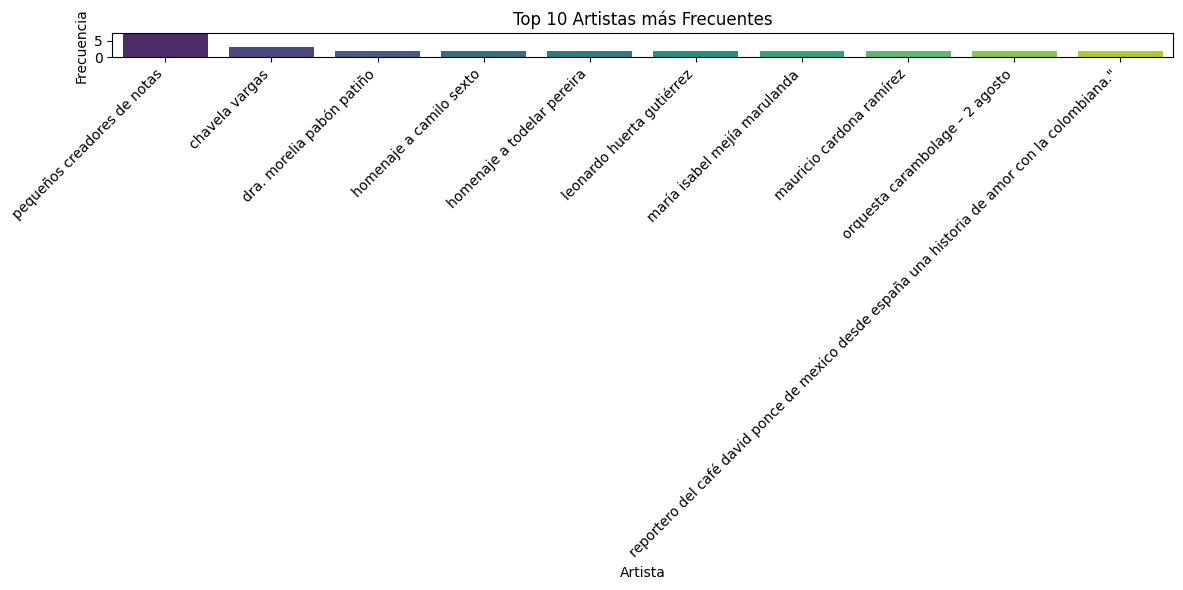

In [18]:
#Aqui mostramos los 10 artistas mas frecuentes del dataset

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_stats.head(10).index, y=artist_stats.head(10)['Count'], hue=artist_stats.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Artistas más Frecuentes')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1622058863.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


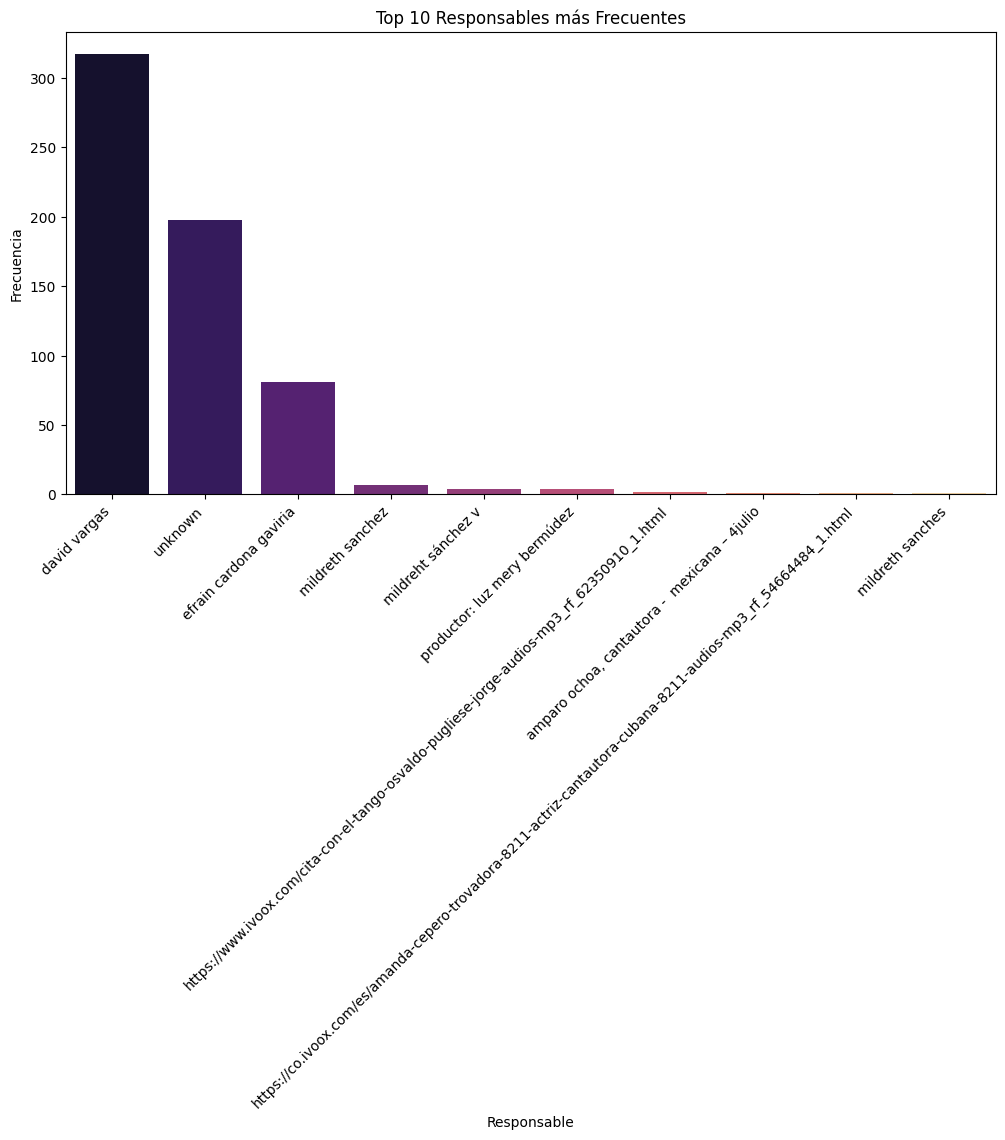

In [19]:
#Muestras los top 10 'Responsables' mas frecuentes

plt.figure(figsize=(12, 6))
sns.barplot(x=responsable_stats.head(10).index, y=responsable_stats.head(10)['Count'], hue=responsable_stats.head(10).index, palette='magma', legend=False)
plt.title('Top 10 Responsables más Frecuentes')
plt.xlabel('Responsable')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

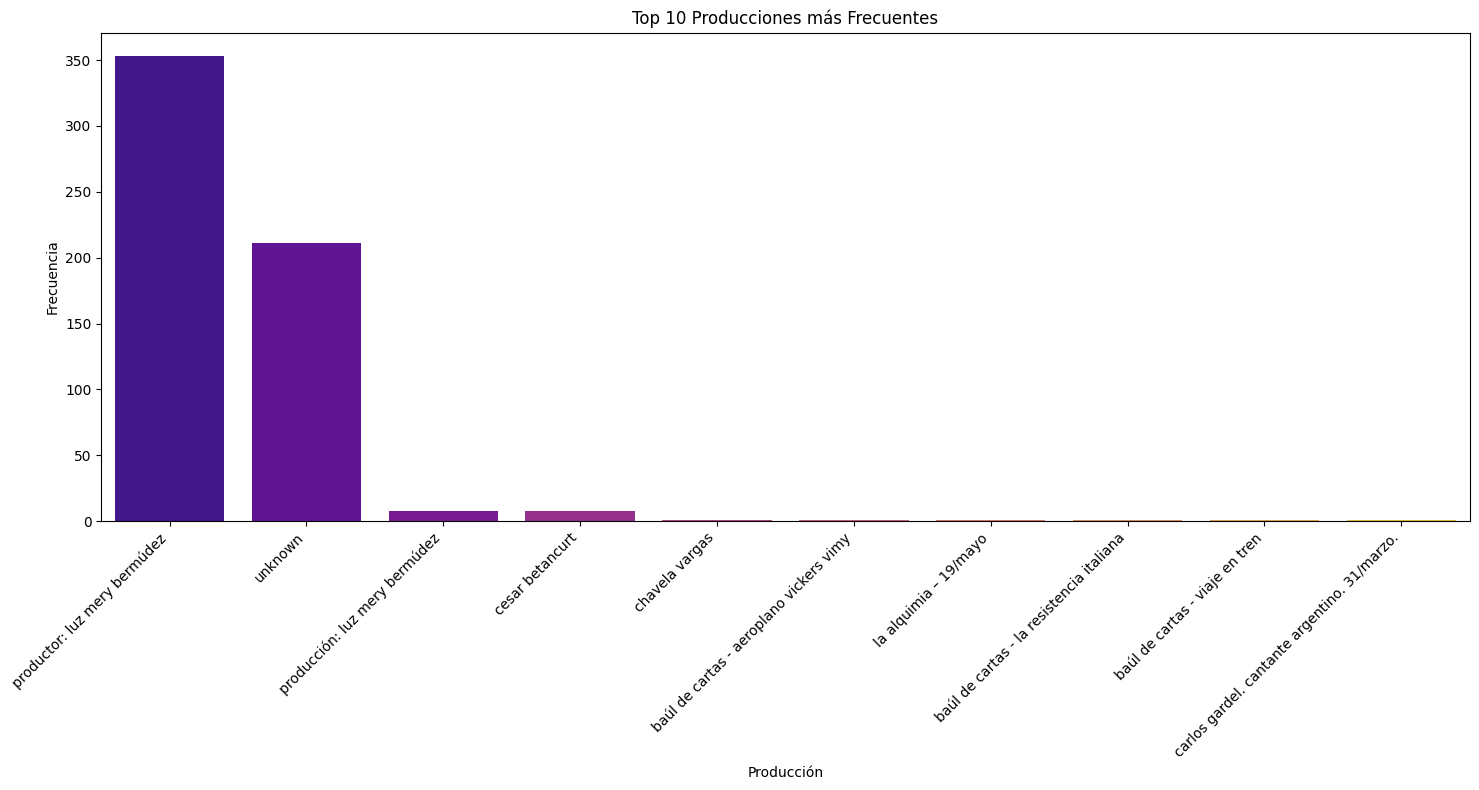

In [21]:
#Muestras los top 10 'Producciones' mas frecuentes

plt.figure(figsize=(15, 8))
sns.barplot(x=production_stats.head(10).index, y=production_stats.head(10)['Count'], hue=production_stats.head(10).index, palette='plasma', legend=False)
plt.title('Top 10 Producciones más Frecuentes')
plt.xlabel('Producción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#Relación entre Artistas y Responsables

crosstab_artist_responsable = pd.crosstab(data['Artistas'], data['Responsable'])

melted_crosstab = crosstab_artist_responsable.stack().reset_index(name='count')

sorted_combinations = melted_crosstab.sort_values(by='count', ascending=False)

print("Top 10 combinaciones más frecuentes de Artistas y Responsables:")
print(sorted_combinations[sorted_combinations['count'] > 0].head(10))

Top 10 combinaciones más frecuentes de Artistas y Responsables:
                                                Artistas  \
11003                        pequeños creadores de notas   
5651   escucharemos a ismael rodríguez gómez. viajero...   
11701  reportero del café david ponce de mexico desde...   
10748                                   osvaldo pugliese   
9941                               mario demarco 26julio   
9089                                      lengua erotica   
9083              leeremos una serie de cartas famosas."   
11657  relato sobre lo ocurrido en esta fecha que ori...   
10711                    orquesta carambolage – 2 agosto   
12273     tangos clasicos – quinteto tipico buenos aires   

                                             Responsable  count  
11003                                       david vargas      7  
5651                                             unknown      2  
11701                                            unknown      2  
10748  http

In [23]:
#Artistas y Tipos de Producción

crosstab_artist_production = pd.crosstab(data['Artistas'], data['Produción'])
melted_crosstab_production = crosstab_artist_production.stack().reset_index(name='count')
sorted_combinations_production = melted_crosstab_production.sort_values(by='count', ascending=False)

print("\nTop 10 combinaciones más frecuentes de Artistas y Producción:")
print(sorted_combinations_production[sorted_combinations_production['count'] > 0].head(10))


Top 10 combinaciones más frecuentes de Artistas y Producción:
                                                Artistas  \
26047                        pequeños creadores de notas   
7587                                      chavela vargas   
9669                              directora: diana vega"   
10967                                  el feeling cubano   
21473             leeremos una serie de cartas famosas."   
23501                              mario demarco 26julio   
24437  nandino cercano al grupo mexicano contemporáne...   
27661  reportero del café david ponce de mexico desde...   
27557  relato sobre lo ocurrido en esta fecha que ori...   
13361  escucharemos a ismael rodríguez gómez. viajero...   

                          Produción  count  
26047  productor: luz mery bermúdez      7  
7587   productor: luz mery bermúdez      2  
9669                        unknown      2  
10967  productor: luz mery bermúdez      2  
21473                       unknown      2  
23501 

In [24]:
#Responsables y Tipos de Producción

crosstab_responsable_production = pd.crosstab(data['Responsable'], data['Produción'])
melted_crosstab_responsable_production = crosstab_responsable_production.stack().reset_index(name='count')
sorted_combinations_responsable_production = melted_crosstab_responsable_production.sort_values(by='count', ascending=False)

print("\nTop 10 combinaciones más frecuentes de Responsable y Producción:")
print(sorted_combinations_responsable_production[sorted_combinations_responsable_production['count'] > 0].head(10))


Top 10 combinaciones más frecuentes de Responsable y Producción:
                       Responsable  \
203                   david vargas   
1037                       unknown   
255         efrain cardona gaviria   
814               mildreth sanchez   
254         efrain cardona gaviria   
933   productor: luz mery bermúdez   
722             mildreht sánchez v   
222         efrain cardona gaviria   
723             mildreht sánchez v   
223         efrain cardona gaviria   

                                              Produción  count  
203                        productor: luz mery bermúdez    317  
1037                                            unknown    198  
255                        productor: luz mery bermúdez     35  
814                                     cesar betancurt      7  
254                       producción: luz mery bermúdez      5  
933                                             unknown      4  
722                       producción: luz mery bermúdez     

/tmp/ipython-input-1750285392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_combinations['Artistas'] + ' - ' + sorted_combinations['Responsable'], y=sorted_combinations['count'], palette='viridis')
/tmp/ipython-input-1750285392.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


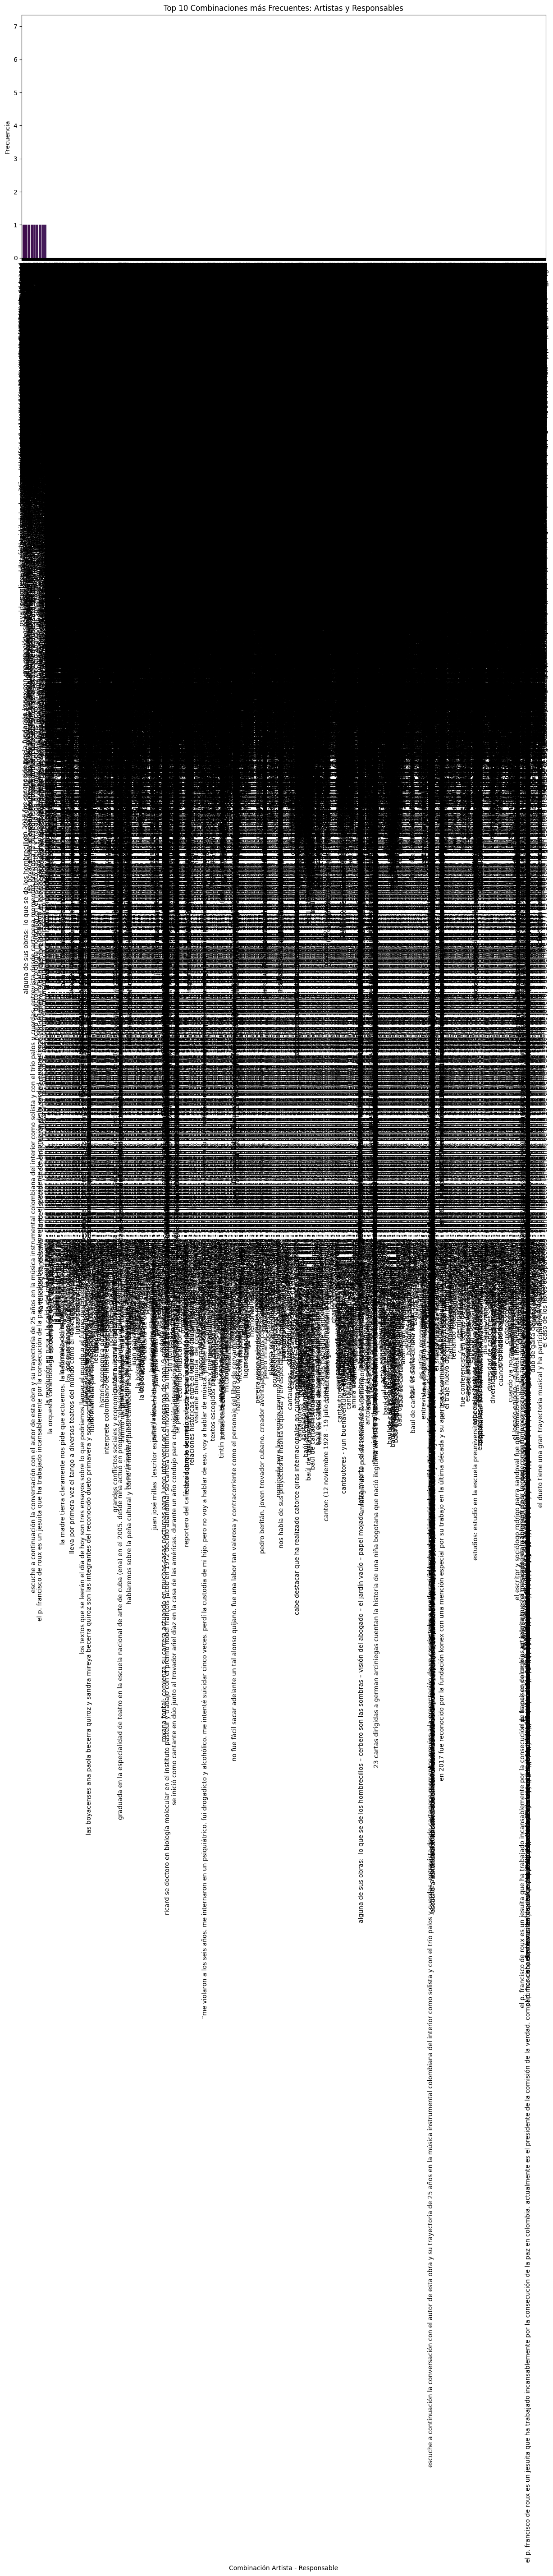

In [26]:
#Visualización de Relaciones Clave

plt.figure(figsize=(15, 7))
sns.barplot(x=sorted_combinations['Artistas'] + ' - ' + sorted_combinations['Responsable'], y=sorted_combinations['count'], palette='viridis')
plt.title('Top 10 Combinaciones más Frecuentes: Artistas y Responsables')
plt.xlabel('Combinación Artista - Responsable')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


## Presentar Observaciones Finales


## Resumen:

### Hallazgos Clave del Análisis de Datos

* **Datos Iniciales y Limpieza**: El conjunto de datos contenía inicialmente 1327 filas y 5 columnas, todas de tipo `object`. Tras gestionar los valores faltantes (imputando 24 entradas de "Enlace" con "Enlace Desconocido" y "No aplica" en otras columnas con "desconocido"), estandarizar el texto (minúsculas, eliminación de espacios en blanco) y eliminar 699 filas duplicadas, el conjunto de datos se redujo a 628 entradas únicas.
* **Artistas Más Frecuentes**: "Pequeños creadores de notas" fue el artista más frecuente, con 7 apariciones (1,11% de las entradas únicas).
* **Responsables Más Frecuentes**: "David Vargas" fue el responsable más frecuente, con 317 apariciones (50,48% de las entradas únicas). "Desconocido" (debido a la imputación) ocupó el segundo lugar con 198 apariciones (31,53%).
* **Producciones más frecuentes**: «Productor: luz mery bermúdez» fue la producción más común, con 353 apariciones (56,21 % de las entradas únicas). «Desconocido» ocupó el segundo lugar con 211 apariciones (33,60 %).
* **Relaciones clave**:
* La combinación artista-responsable más frecuente fue «Pequeños creadores de notas» con «David Vargas» (7 apariciones).
* La combinación artista-producción más frecuente fue «Pequeños creadores de notas» con «Productor: luz mery bermúdez» (7 apariciones).
* La combinación responsable-producción «David Vargas» con «Productor: luz mery bermúdez» fue, con diferencia, la más frecuente, con 317 apariciones, lo que indica una fuerte asociación entre ambos.

### Perspectivas o próximos pasos

* La alta frecuencia de valores «desconocidos» (resultante de la imputación de «No aplica» y «NaN») en varias columnas clave («Enlace», «Descripción», «Responsable», «Producción») sugiere que una parte significativa de los datos originales carecía de información detallada. La recopilación de datos futura debería buscar la exhaustividad en estos campos para permitir un análisis más granular.
* La abrumadora predominancia de «David Vargas» como responsable y de «Productor: Luz Mery Bermúdez» como producción sugiere una fuerte centralización del contenido. Una investigación más profunda podría explorar si esta centralización es un resultado deseado o si la diversificación de las fuentes de contenido es un objetivo.
